In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

C:\Users\strub\anaconda3\envs\prophet39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('../series2_weekly_normalized.csv')
df.columns = ['A','ds','y']
del df['A']
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2016-01-01,0.605058
1,2016-01-02,0.514266
2,2016-01-03,0.406297
3,2016-01-04,0.353429
4,2016-01-05,0.392692


In [3]:
m = Prophet(weekly_seasonality=True,seasonality_mode='additive')      
#m = Prophet()   
#m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(df)

11:02:40 - cmdstanpy - INFO - Chain [1] start processing
11:02:40 - cmdstanpy - INFO - Chain [1] done processing


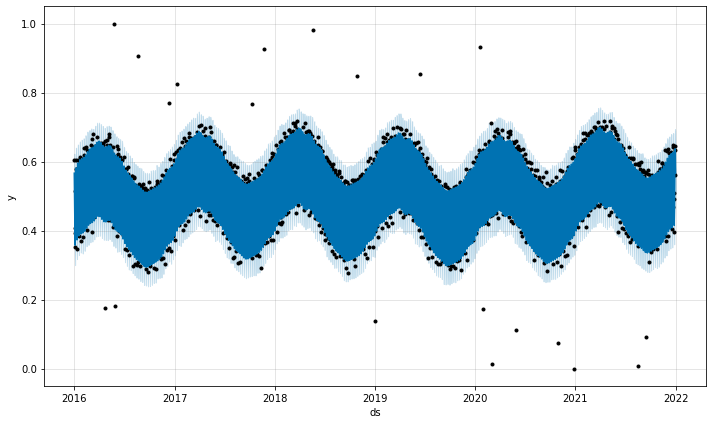

In [4]:
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)
m.plot(forecast);

In [5]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,0.467966,0.510498,0.622994,0.467966,0.467966,0.098463,0.098463,0.098463,0.100161,0.100161,0.100161,-0.001697,-0.001697,-0.001697,0.0,0.0,0.0,0.566429
1,2016-01-02,0.468045,0.442054,0.552690,0.468045,0.468045,0.029205,0.029205,0.029205,0.029030,0.029030,0.029030,0.000175,0.000175,0.000175,0.0,0.0,0.0,0.497250
2,2016-01-03,0.468125,0.344370,0.454817,0.468125,0.468125,-0.067022,-0.067022,-0.067022,-0.069155,-0.069155,-0.069155,0.002133,0.002133,0.002133,0.0,0.0,0.0,0.401103
3,2016-01-04,0.468204,0.299810,0.412399,0.468204,0.468204,-0.110475,-0.110475,-0.110475,-0.114638,-0.114638,-0.114638,0.004163,0.004163,0.004163,0.0,0.0,0.0,0.357730
4,2016-01-05,0.468284,0.353389,0.460527,0.468284,0.468284,-0.063869,-0.063869,-0.063869,-0.070116,-0.070116,-0.070116,0.006247,0.006247,0.006247,0.0,0.0,0.0,0.404415


In [6]:
df_prediction = pd.DataFrame(columns=['ds', 'trendN', 'yearlyN','monthlyN'])
df_prediction.ds = forecast['ds'] 
df_prediction.trendN =  (forecast['trend'] - forecast['trend'].min()) / (forecast['trend'].max() - forecast['trend'].min()) + 1
df_prediction.yearlyN = (forecast['yearly'] - forecast['yearly'].min()) / (forecast['yearly'].max() - forecast['yearly'].min()) 
df_prediction.monthlyN = (forecast['weekly'] - forecast['weekly'].min()) / (forecast['weekly'].max() - forecast['weekly'].min()) 
df_prediction.head()                                                                         

,ds,trendN,yearlyN,monthlyN
0,2016-01-01,1.000000,0.485860,9.886408e-01
1,2016-01-02,1.001119,0.497407,6.612524e-01
2,2016-01-03,1.002239,0.509487,2.093414e-01
3,2016-01-04,1.003358,0.522007,1.030297e-13
4,2016-01-05,1.004478,0.534865,2.049162e-01


In [7]:
# Load True Values
df_true = pd.read_csv('../series2_weekly_complete.csv')
df_true.head()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise
0,2016-01-01,0.605058,0.529672,1.000000,0.500000,2.363946,1.000000,1.5,1.000000,1.386899
1,2016-01-02,0.514266,0.444995,1.017213,0.508607,1.362371,0.650246,2.0,1.000891,1.187663
2,2016-01-03,0.406297,0.344108,1.034422,0.517211,0.087924,0.205205,2.5,1.001783,1.037538
3,2016-01-04,0.353429,0.294675,1.051620,0.525810,-0.499712,0.000000,3.0,1.002674,0.918400
4,2016-01-05,0.392692,0.331538,1.068802,0.534402,0.041966,0.189156,3.5,1.003566,0.870111


# MAE FOR Yearly SEASONALITY

In [8]:
# Standardize Yearly Pred 

mean = sum(df_prediction['yearlyN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['yearlyN'] - mean)**2 ) / len(df_prediction))
df_prediction['yearlyS']= (df_prediction['yearlyN'] - mean) / standard_deviation

df_prediction.tail()

,ds,trendN,yearlyN,monthlyN,yearlyS
2188,2021-12-28,1.995194,0.450636,0.204916,-0.137631
2189,2021-12-29,1.996396,0.459802,0.629307,-0.110021
2190,2021-12-30,1.997597,0.469706,1.000000,-0.080185
2191,2021-12-31,1.998799,0.480311,0.988641,-0.048238
2192,2022-01-01,2.000000,0.491562,0.661252,-0.014348


In [9]:
# Standardize Yearly True

mean = sum(df_true['trueYearlyN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueYearlyN'] - mean)**2 ) / len(df_true))
df_true['trueYearlyS']= (df_true['trueYearlyN'] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueYearlyS
2187,2021-12-27,0.396557,0.366862,0.948380,0.474190,-0.499712,5.750717e-10,559.2,1.994295,0.591832,-0.073046
2188,2021-12-28,0.509969,0.512784,0.965578,0.482789,0.041966,1.891559e-01,560.0,1.995721,1.508898,-0.048713
2189,2021-12-29,0.561928,0.653000,0.982787,0.491393,1.305063,6.302341e-01,560.8,1.997147,0.904003,-0.024366
2190,2021-12-30,0.645526,0.806587,1.000000,0.500000,2.338442,9.910937e-01,561.6,1.998574,0.940978,-0.000011
2191,2021-12-31,0.635107,0.800258,1.017213,0.508607,2.363946,1.000000e+00,562.4,2.000000,0.761115,0.024343


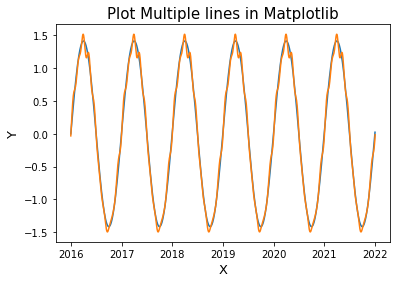

In [10]:
#Figure to compare actual and predictat yearly seasonality  

import matplotlib.pyplot as plt 

y1 = df_true['trueYearlyS']
y2 = df_prediction['yearlyS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['ds'])


plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

### MAE

In [11]:
y_true = df_true['trueYearlyS']
y_pred = df_prediction['yearlyS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.055831137930289945


### RMSE

In [136]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.49019757214116977


# MAE FOR Monthly SEASONALITY

In [14]:
# Standardize monthly Pred 

mean = sum(df_prediction['monthlyN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['monthlyN'] - mean)**2 ) / len(df_prediction))
df_prediction['monthlyS']= (df_prediction['monthlyN'] - mean) / standard_deviation

df_prediction.tail()

,ds,trendN,yearlyN,monthlyN,trendS,yearlyS,monthlyS
2188,2021-12-28,1.005096,0.628827,3.532047e-02,-2.326396,0.024684,-0.844926
2189,2021-12-29,1.003822,0.642079,1.484558e-02,-2.331370,0.074946,-0.888414
2190,2021-12-30,1.002548,0.654016,5.317402e-02,-2.336344,0.120221,-0.807006
2191,2021-12-31,1.001274,0.664438,2.303702e-12,-2.341317,0.159752,-0.919945
2192,2022-01-01,1.000000,0.673196,1.000000e+00,-2.346291,0.192971,1.204013


In [15]:
# Standardize Monthly True

mean = sum(df_true['trueMonthlyN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueMonthlyN'] - mean)**2 ) / len(df_true))
df_true['trueMonthlyS']= (df_true['trueMonthlyN'] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueTrendS,trueYearlyS,trueMonthlyS
2187,2021-12-27,0.458799,4.782127,0.948380,0.554382,1.5,1.0,-31677.25,1.006832,1.310189,-2.474436,-0.053422,1.154086
2188,2021-12-28,0.306463,3.035988,0.965578,0.556886,0.5,0.0,-31793.80,1.005126,0.557771,-2.481351,-0.035626,-0.866486
2189,2021-12-29,0.354178,3.577583,0.982787,0.559392,0.5,0.0,-31910.45,1.003419,1.086309,-2.488272,-0.017820,-0.866486
2190,2021-12-30,0.342260,3.439193,1.000000,0.561898,0.5,0.0,-32027.20,1.001710,0.934917,-2.495200,-0.000008,-0.866486
2191,2021-12-31,0.360407,3.643537,1.017213,0.564405,0.5,0.0,-32144.05,1.000000,1.126324,-2.502133,0.017803,-0.866486


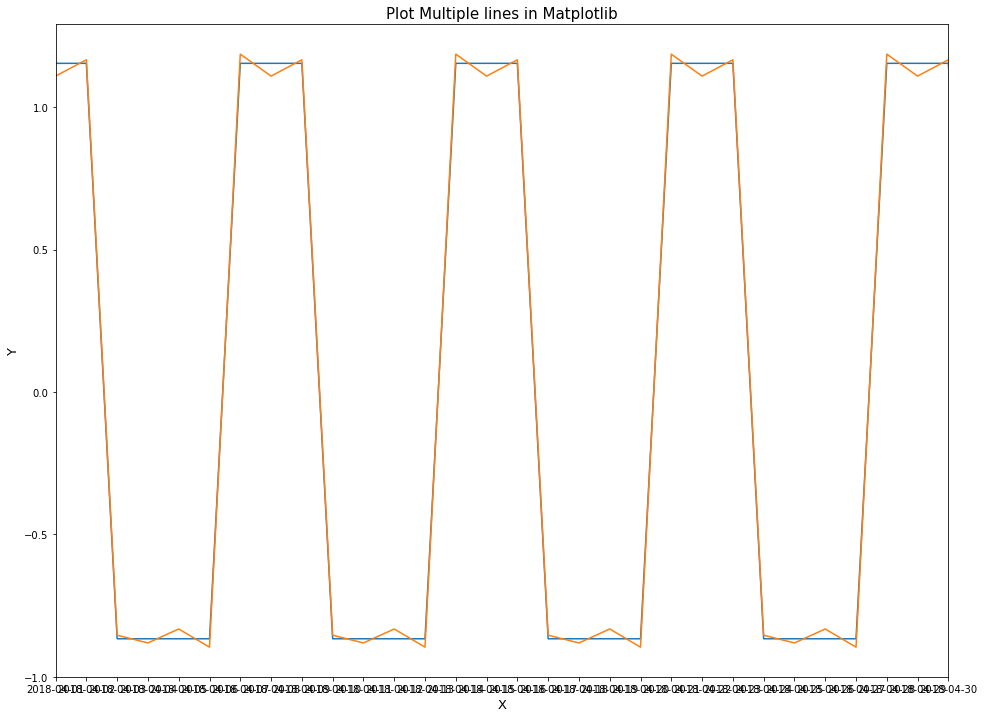

In [139]:
#Figure to compare actual and predictat monthly seasonality  

import matplotlib.pyplot as plt 

y1 = df_true['trueMonthlyS']
y2 = df_prediction['monthlyS'][0:2192]
x1 = df_true['date']
x2 = pd.to_datetime(df_prediction['ds'])


plt.plot(x1, y1)
plt.plot(x1, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.xlim('2018-04-01','2018-04-30')
plt.show()

### MAE Monthly

In [140]:
y_true = df_true['trueMonthlyS']
y_pred = df_prediction['monthlyS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.026718555097363882


### RMSE Monthly

In [142]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.05216321725203644


# MAE FOR TREND 

In [12]:
# Standardize Trend Pred 

mean = sum(df_prediction['trendN']) / len(df_prediction)
standard_deviation = math.sqrt( sum((df_prediction['trendN'] - mean)**2 ) / len(df_prediction))
df_prediction['trendS']= (df_prediction['trendN'] - mean) / standard_deviation

df_prediction.tail()

,ds,trendN,yearlyN,monthlyN,yearlyS,trendS
2188,2021-12-28,1.995194,0.450636,0.204916,-0.137631,2.530156
2189,2021-12-29,1.996396,0.459802,0.629307,-0.110021,2.536141
2190,2021-12-30,1.997597,0.469706,1.000000,-0.080185,2.542126
2191,2021-12-31,1.998799,0.480311,0.988641,-0.048238,2.548112
2192,2022-01-01,2.000000,0.491562,0.661252,-0.014348,2.554097


In [13]:
df_prediction.to_csv('prophetSeries2.csv',index=False)

In [9]:
# Standardize Trend True 

mean = sum(df_true['trueTrendN']) / len(df_true)
standard_deviation = math.sqrt( sum((df_true['trueTrendN'] - mean)**2 ) / len(df_true))
df_true['trueTrendS']= (df_true['trueTrendN'] - mean) / standard_deviation

df_true.tail()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise,trueTrendS
2187,2021-12-27,0.458799,4.782127,0.948380,0.554382,1.5,1.0,-31677.25,1.006832,1.310189,-2.474436
2188,2021-12-28,0.306463,3.035988,0.965578,0.556886,0.5,0.0,-31793.80,1.005126,0.557771,-2.481351
2189,2021-12-29,0.354178,3.577583,0.982787,0.559392,0.5,0.0,-31910.45,1.003419,1.086309,-2.488272
2190,2021-12-30,0.342260,3.439193,1.000000,0.561898,0.5,0.0,-32027.20,1.001710,0.934917,-2.495200
2191,2021-12-31,0.360407,3.643537,1.017213,0.564405,0.5,0.0,-32144.05,1.000000,1.126324,-2.502133


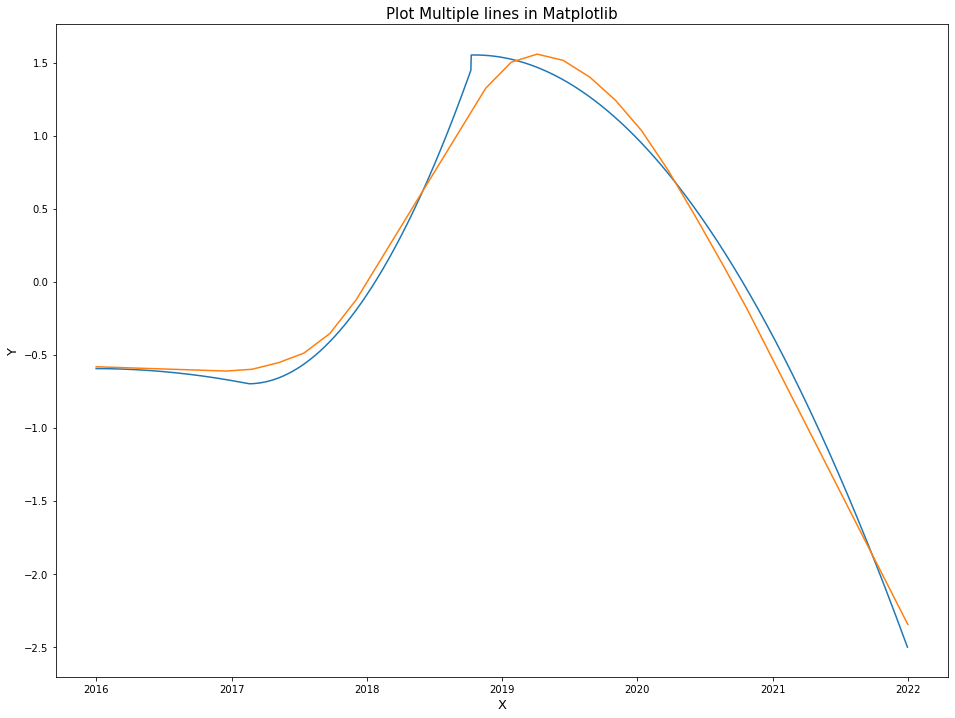

In [11]:
import matplotlib.pyplot as plt 

y1 = df_true['trueTrendS']
y2 = df_prediction['trendS']
x1 = pd.to_datetime(df_true['date'])
x2 = pd.to_datetime(df_prediction['ds'])


plt.plot(x1, y1)
plt.plot(x2, y2)

plt.title("Plot Multiple lines in Matplotlib",fontsize=15)
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
#plt.legend()
plt.rcParams["figure.figsize"] = (16,12)
plt.show()

### MAE Trend

In [146]:
y_true = df_true['trueTrendS']
y_pred = df_prediction['trendS'][0:2192]
print("Mean Absolute Error:\n")
print(mean_absolute_error(y_true, y_pred))

Mean Absolute Error:

0.07303181282465349


### RMSE Trend

In [147]:
mse=mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(rmse)

Root Mean Square Error:

0.0915327470034803


### Changepoints

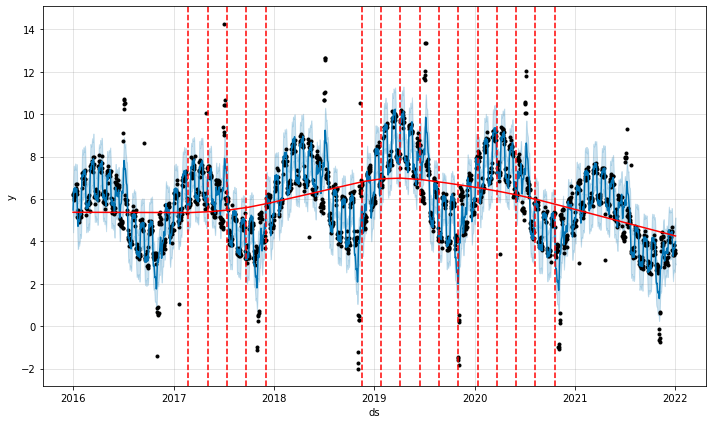

In [305]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [306]:
m.changepoints

70     2016-03-11
140    2016-05-20
210    2016-07-29
280    2016-10-07
350    2016-12-16
420    2017-02-24
491    2017-05-06
561    2017-07-15
631    2017-09-23
701    2017-12-02
771    2018-02-10
841    2018-04-21
911    2018-06-30
981    2018-09-08
1051   2018-11-17
1121   2019-01-26
1191   2019-04-06
1261   2019-06-15
1332   2019-08-25
1402   2019-11-03
1472   2020-01-12
1542   2020-03-22
1612   2020-05-31
1682   2020-08-09
1752   2020-10-18
Name: ds, dtype: datetime64[ns]